In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pycaret as pcr
from utils.utils import get_project_root
from scipy.stats import zscore

## Importing of data

In [5]:
df = pd.read_excel(get_project_root() / 'data/Belyy2017_GHG.xls')

In [6]:
df.head()

,#,Year,fulldate (GMT),fulldate (GMT+5),Local Date,Local time (GMT+5),DayWeek,up_CO2_dry,up_CH4_dry,up_CO,...,Ch,VV,Td,RRR,tR,E,Tg,E.,sss,5.977980152803348
0,1.0,2017,2017-07-13 19:00:00,2017-07-14 00:00:00,2017-07-14,0,5,401.014516,1.978242,0.073865,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.993998
1,NaN,2017,2017-07-13 20:00:00,2017-07-14 01:00:00,2017-07-14,1,5,401.098192,1.973113,0.074091,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.994206
2,NaN,2017,2017-07-13 21:00:00,2017-07-14 02:00:00,2017-07-14,2,5,400.871686,1.966405,0.072917,...,"Перистых, перисто-кучевых или перисто-слоистых...",20.0,5.2,NaN,NaN,NaN,NaN,NaN,NaN,5.993641
3,NaN,2017,2017-07-13 22:00:00,2017-07-14 03:00:00,2017-07-14,3,5,400.772022,1.965230,0.073807,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.993393
4,NaN,2017,2017-07-13 23:00:00,2017-07-14 04:00:00,2017-07-14,4,5,400.726623,1.954376,0.071886,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.993279


In [7]:
df.shape

(3231, 52)

## Exploring of dataset

In [8]:
df.describe()

,#,Year,fulldate (GMT),fulldate (GMT+5),Local Date,Local time (GMT+5),DayWeek,up_CO2_dry,up_CH4_dry,up_CO,...,ff3,Tn,Tx,VV,Td,tR,Tg,E.,sss,5.977980152803348
count,1270.000000,3231.000000,3231,3231,3231,3231.000000,3231.000000,3210.000000,3210.000000,3210.000000,...,400.00000,127.000000,113.000000,914.000000,925.000000,230.0,4.000000,0.0,0.0,1176.000000
mean,634.500787,2016.120706,2016-09-17 03:38:06.350974976,2016-09-17 08:38:06.350975232,2016-09-16 21:08:24.735375872,11.494893,4.043640,392.628731,1.952278,0.091762,...,13.63000,6.820472,10.970796,17.410284,5.978162,12.0,8.500000,NaN,NaN,5.977980
min,1.000000,2015.000000,2015-07-15 13:00:00,2015-07-15 18:00:00,2015-07-15 00:00:00,0.000000,1.000000,372.560000,1.885600,0.067095,...,10.00000,-1.300000,2.800000,0.200000,-2.000000,12.0,7.000000,NaN,NaN,5.960789
25%,317.250000,2016.000000,2016-07-09 05:30:00,2016-07-09 10:30:00,2016-07-09 00:00:00,5.000000,2.000000,390.735845,1.912182,0.081992,...,11.00000,4.000000,7.600000,20.000000,3.300000,12.0,7.000000,NaN,NaN,5.973159
50%,634.500000,2016.000000,2016-08-11 21:00:00,2016-08-12 02:00:00,2016-08-12 00:00:00,11.000000,4.000000,392.513816,1.924880,0.088616,...,13.00000,6.600000,9.900000,20.000000,5.600000,12.0,8.000000,NaN,NaN,5.977504
75%,951.750000,2017.000000,2017-07-29 02:30:00,2017-07-29 07:30:00,2017-07-29 00:00:00,18.000000,6.000000,394.569368,1.975191,0.099339,...,15.00000,9.700000,13.700000,20.000000,8.500000,12.0,9.500000,NaN,NaN,5.982158
max,1269.000000,2017.000000,2017-08-31 18:00:00,2017-08-31 23:00:00,2017-08-31 00:00:00,23.000000,7.000000,497.890000,2.369614,0.292851,...,28.00000,12.700000,26.200000,50.000000,16.300000,12.0,11.000000,NaN,NaN,6.008309
std,366.760368,0.769971,NaN,NaN,NaN,6.931234,2.015332,5.742818,0.060282,0.016818,...,3.04899,3.321869,4.926743,6.477632,3.444460,0.0,1.914854,NaN,NaN,0.006638


In [9]:
print(df.isna().sum())

#                     1961
Year                     0
fulldate (GMT)           0
fulldate (GMT+5)         0
Local Date               0
Local time (GMT+5)       0
DayWeek                  0
up_CO2_dry              21
up_CH4_dry              21
up_CO                   21
up_H2O                  21
bot_CO2_dry            786
bot_CH4_dry            786
bot_CO                 786
bot_H2O                786
t                        9
hr                       9
p                        9
ws                       9
wd                       9
wdrumb                   9
Unnamed: 21           3231
wddeg                    9
T                     2306
Po                    2306
P                     2306
Pa                    2412
U                     2307
DD                    2308
Ff                    2305
ff10                  2930
ff3                   2831
N                     2323
WW                    2305
W1                    2975
W2                    2975
Tn                    3104
T

In [10]:
print(df.isna().sum() / (df.shape[0]))

#                     0.606933
Year                  0.000000
fulldate (GMT)        0.000000
fulldate (GMT+5)      0.000000
Local Date            0.000000
Local time (GMT+5)    0.000000
DayWeek               0.000000
up_CO2_dry            0.006500
up_CH4_dry            0.006500
up_CO                 0.006500
up_H2O                0.006500
bot_CO2_dry           0.243268
bot_CH4_dry           0.243268
bot_CO                0.243268
bot_H2O               0.243268
t                     0.002786
hr                    0.002786
p                     0.002786
ws                    0.002786
wd                    0.002786
wdrumb                0.002786
Unnamed: 21           1.000000
wddeg                 0.002786
T                     0.713711
Po                    0.713711
P                     0.713711
Pa                    0.746518
U                     0.714020
DD                    0.714330
Ff                    0.713401
ff10                  0.906840
ff3                   0.876199
N       

#### В датасете для некоторых колонок измерения обрываются раньше чем для других

## Ploting of dataset

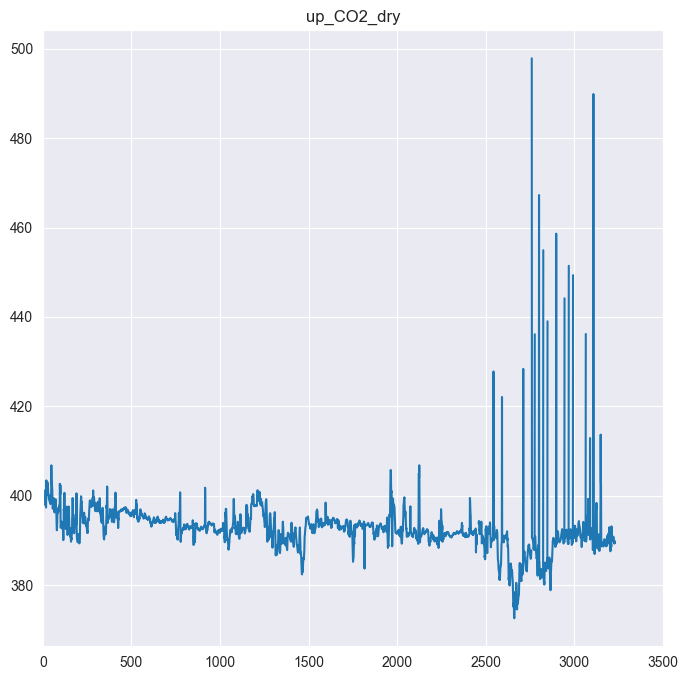

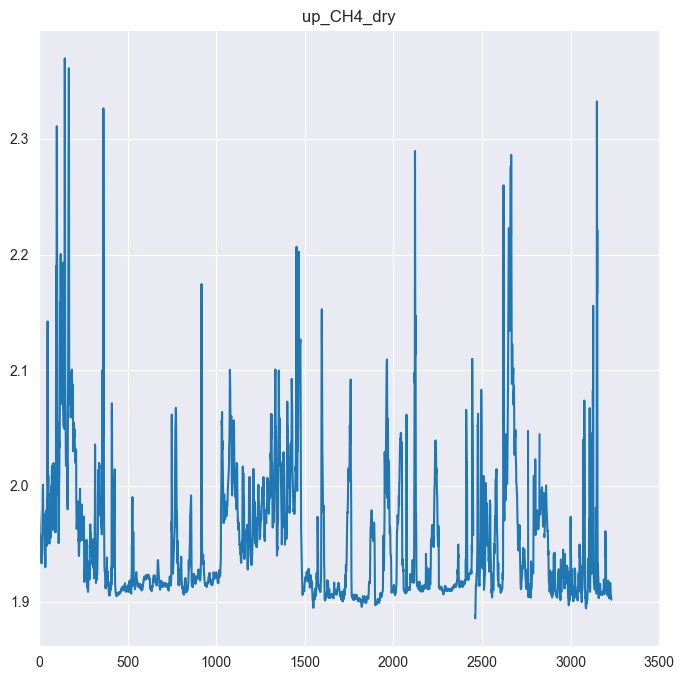

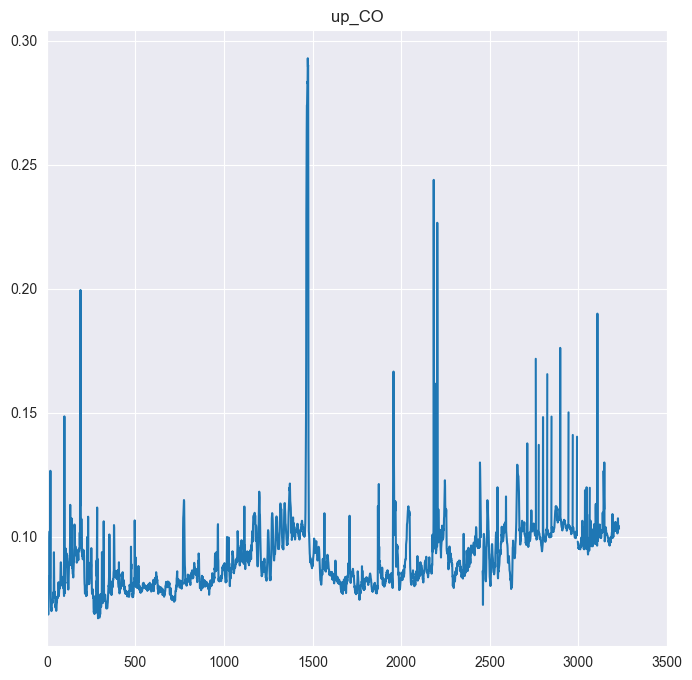

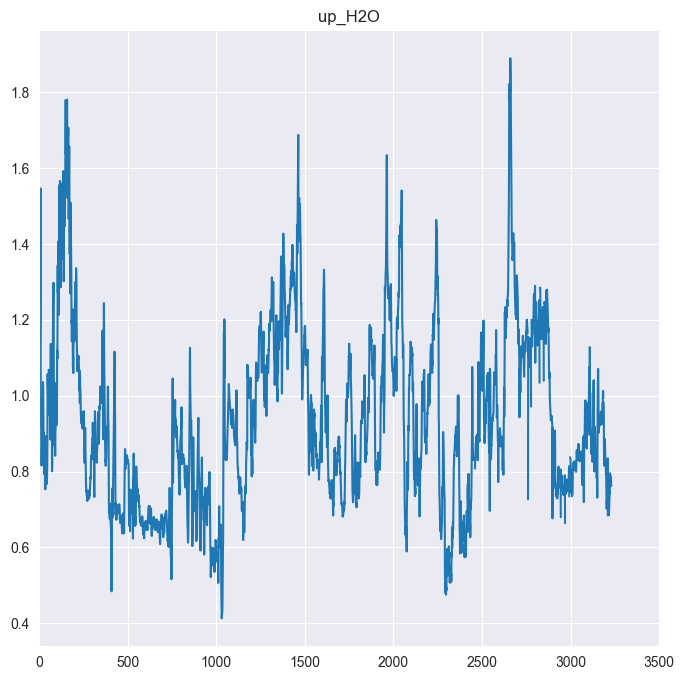

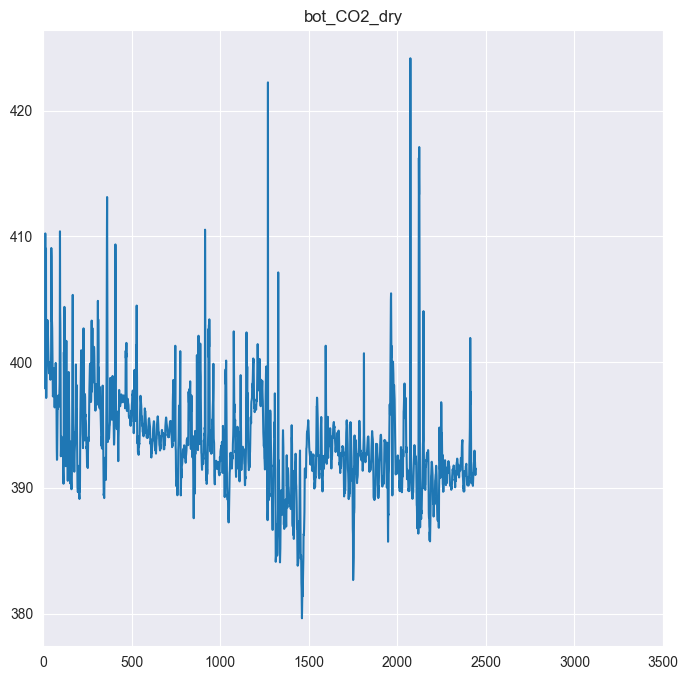

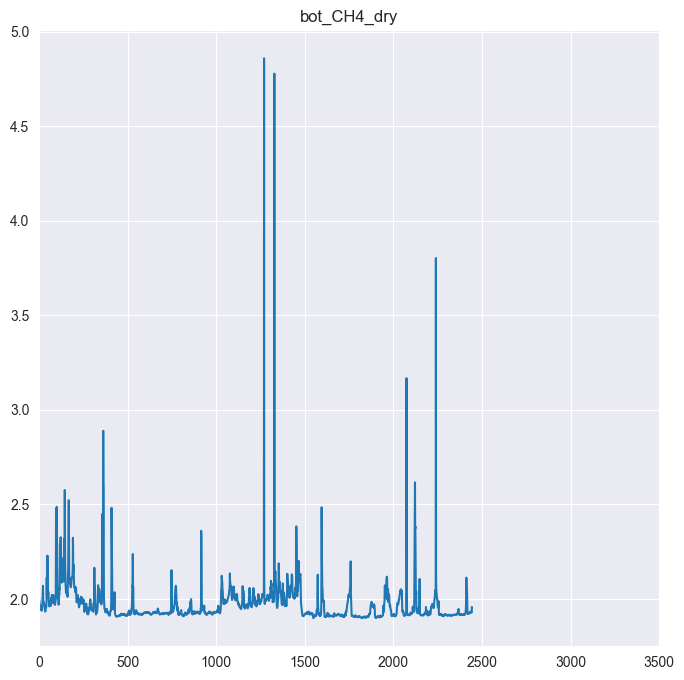

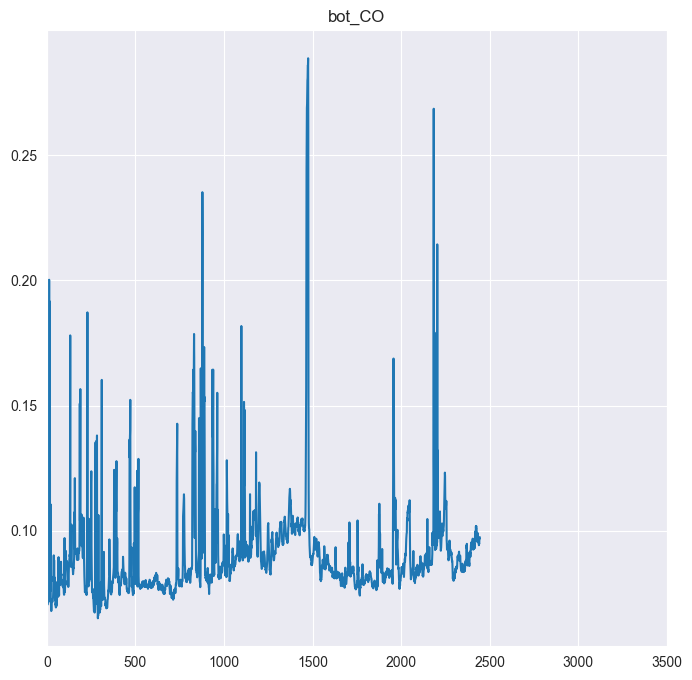

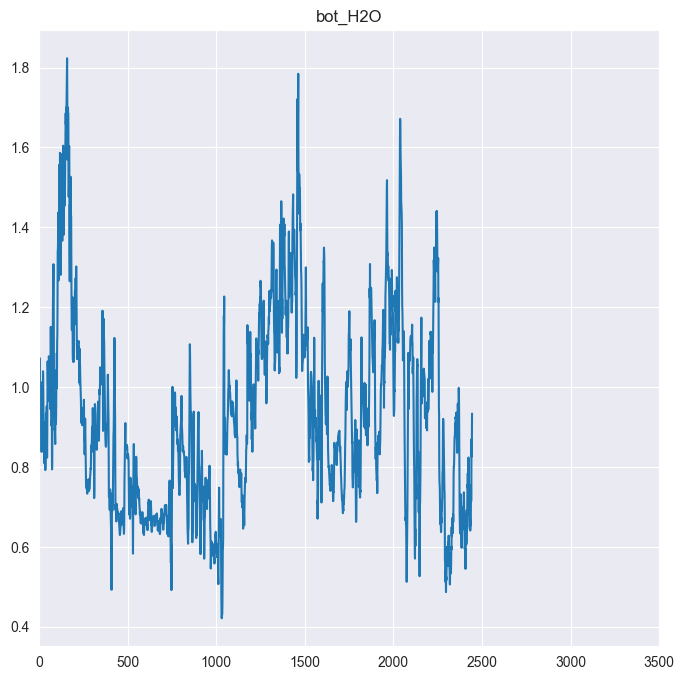

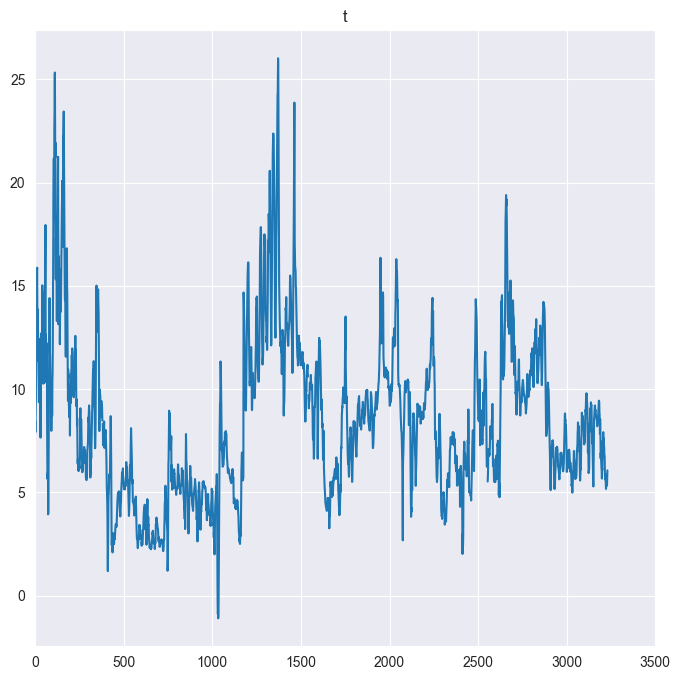

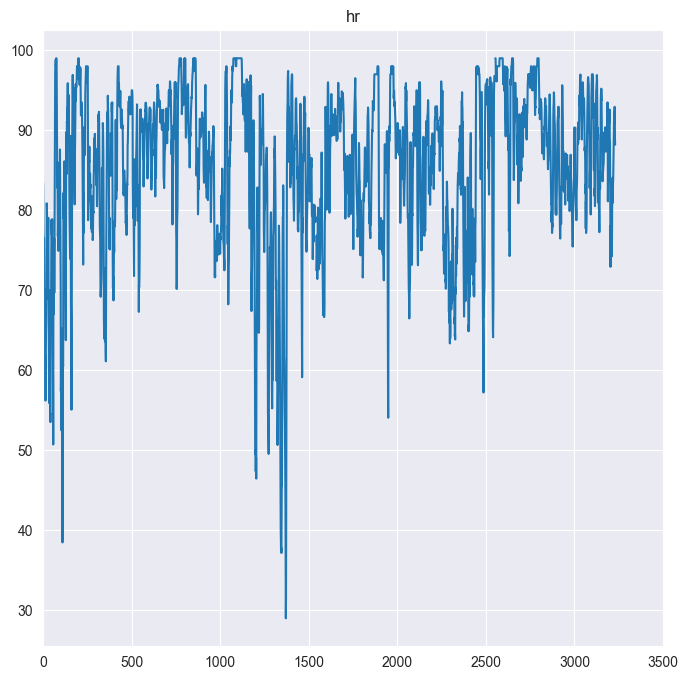

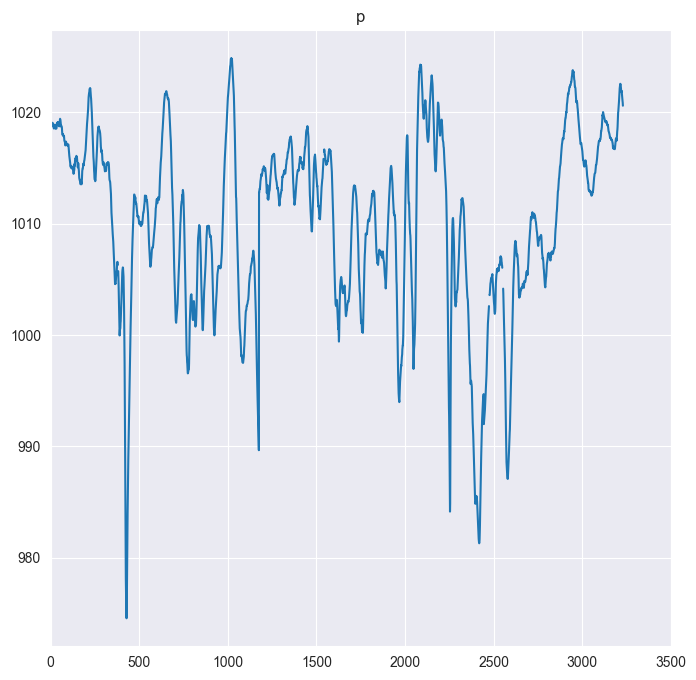

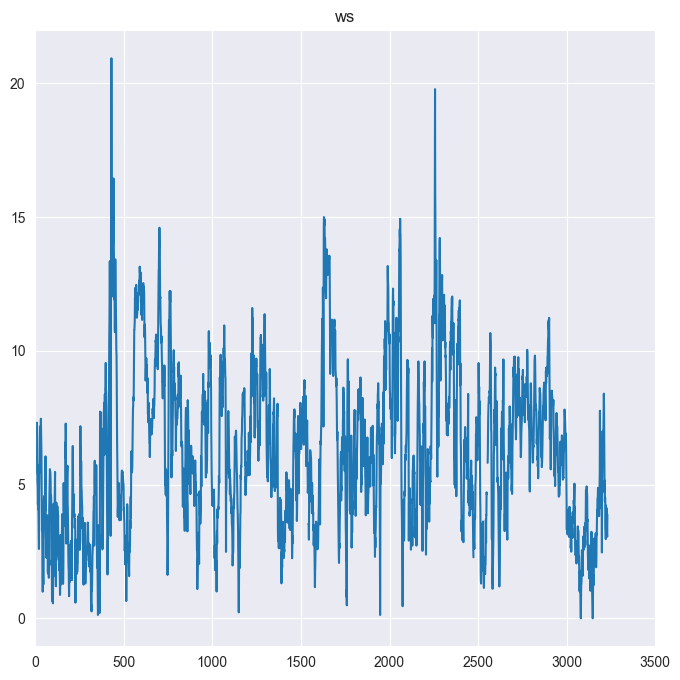

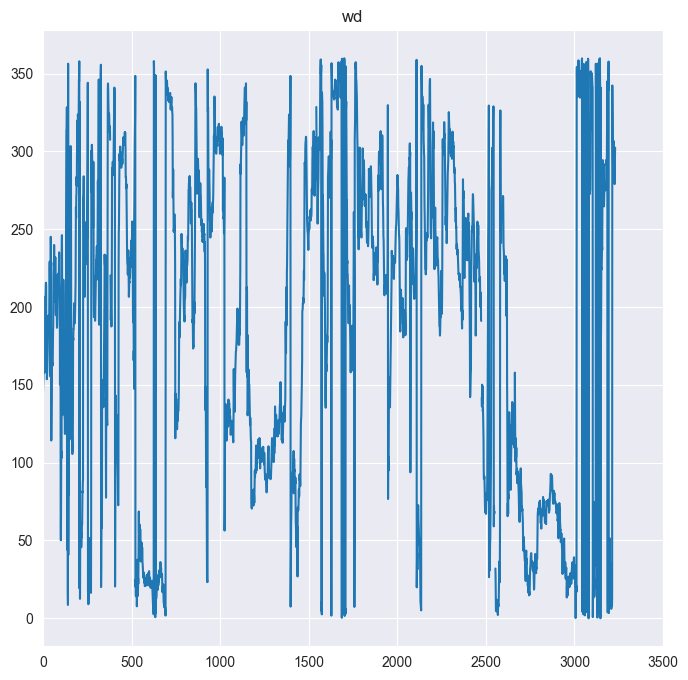

In [11]:
for i in df.columns.tolist()[7:20]:
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(df[i])
    ax.set_title(i)
    ax.set_xlim([0, 3500])


In [16]:

# Предположим, df - это ваш датафрейм
# Сначала создадим список имен нужных колонок
cols_to_keep = df.columns[7:11].tolist() + df.columns[15:20].tolist()

# Затем используем loc для выбора этих колонок
df_filtered = df.loc[:, cols_to_keep]

# df_filtered теперь содержит только нужные колонки
df_filtered.head()

,up_CO2_dry,up_CH4_dry,up_CO,up_H2O,t,hr,p,ws,wd
0,401.014516,1.978242,0.073865,0.970237,8.457333,83.683333,1018.922500,5.407568,144.988896
1,401.098192,1.973113,0.074091,0.921426,7.913000,83.150000,1019.041167,5.649807,148.799682
2,400.871686,1.966405,0.072917,0.969085,8.483000,80.050000,1018.915833,5.744791,153.477841
3,400.772022,1.965230,0.073807,1.046982,9.009833,77.683333,1018.980833,5.746280,156.021014
4,400.726623,1.954376,0.071886,1.092449,9.604000,76.366667,1019.021500,6.412760,159.832866


In [17]:
df_filtered.to_csv(get_project_root() / 'data/Belyy2017_GHG.csv')

In [21]:
df_zscored = df_filtered.apply(zscore, axis=1)

In [22]:
df_zscored.head()

,up_CO2_dry,up_CH4_dry,up_CO,up_H2O,t,hr,p,ws,wd
0,0.675850,-0.572944,-0.578903,-0.576098,-0.552667,-0.317246,2.609608,-0.562212,-0.125388
1,0.674961,-0.573991,-0.579934,-0.577282,-0.555404,-0.319970,2.608643,-0.562486,-0.114538
2,0.673667,-0.574757,-0.580683,-0.577878,-0.554362,-0.330385,2.607913,-0.562932,-0.100583
3,0.673022,-0.574959,-0.580877,-0.577832,-0.552914,-0.338015,2.607575,-0.563127,-0.092874
4,0.671689,-0.576415,-0.582307,-0.579113,-0.552473,-0.343514,2.606869,-0.562461,-0.082276


In [23]:
df_filtered.to_csv(get_project_root() / 'data/Belyy2017_GHG_zscore.csv')